In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
from sklearn.datasets import load_breast_cancer
cancer      = load_breast_cancer()
input_data  = cancer['data']
target_data = cancer['target'] 
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
#transforming in dataframe
features= pd.DataFrame(input_data,columns=cancer['feature_names'])
print(features.head())
features = features.values

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [21]:
#data scaling
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [26]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_PCA = pca.transform(X_scaled)
print(np.shape(X_PCA), np.shape(X_scaled))

(569, 2) (569, 30)


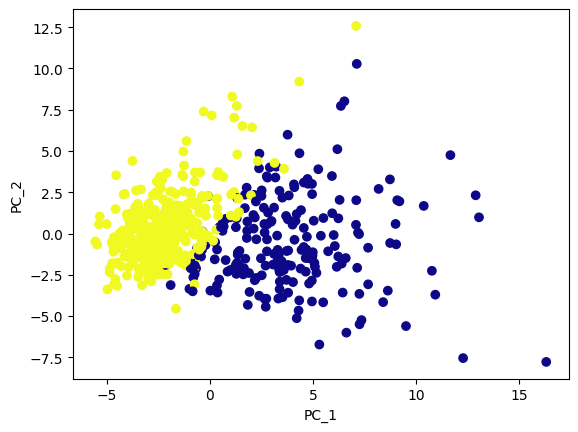

In [29]:
# Seeing the data on the PCA projection
# It is possible to separate the two target options (M or B) on this projection
plt.scatter(X_PCA[:,0],X_PCA[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.show()

<AxesSubplot:>

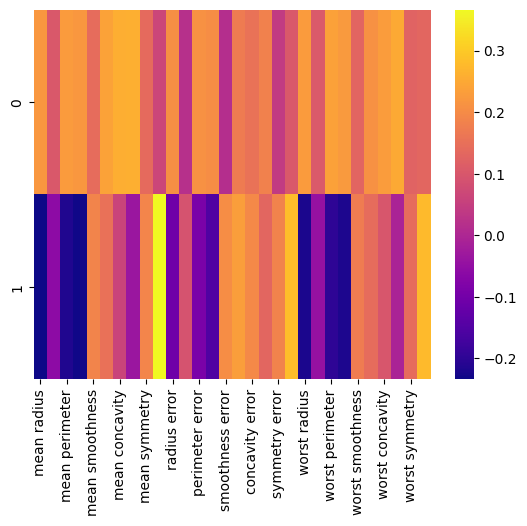

In [30]:
#getting the form of each principal component
PC1 = pca.components_[0]
PC2 = pca.components_[1]

#components heatmap

df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
sns.heatmap(df_comp,cmap='plasma')